https://www.machinelearningnuggets.com/logistic-regression/


In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [88]:
#/* ########################### Read in the data ########################## */
df = pd.read_csv(
    "./data/TT-2018-H1-REDACTED-excluding-Postcodes.csv",
    delimiter=",",
    encoding_errors="replace",
)
df.dataframeName = "2018"

#/* ########################### Clean up the data ########################## */
# Rename columns
df = df.rename(columns={
  "ISF": "age", 
  "ISI": "householdSize",
  "ISJ": "numChildrenInHousehold"
})

# Remove participants with empty age
df = df.dropna(subset=["age"])
df = df[df.age != " "]

# Make dummy columns
df['isRetired'] = np.where(df['SGC'] == "Not working (i.e. under 8hrs/wk) - retired", 1, 0)
df['isHomebound'] = np.where(df['SGF'] == "Not working (i.e. under 8hrs/wk) - housewife/ disabled/ other", 1, 0)

df['usesDVDPlayer'] = np.where(df['QB2K'] == "Not", 0, 1)
df['usesIpod'] = np.where(df['QB2C'] == "Not", 0, 1)
df['usesEbook'] = np.where(df['QB2D'] == "Not", 0, 1)

df['usesGamesTV'] = np.where(df['QB2A'] == "Not", 0, 1)
df['usesGamesHandheld'] = np.where(df['QB2B'] == "Not", 0, 1)
df['usesGamesVR'] = np.where(df['QB2J'] == "Not", 0, 1)

df['usesSmartWatch'] = np.where(df['QB2H'] == "Not", 0, 1)
df['usesSmartSpeaker'] = np.where(df['QB2I'] == "Not", 0, 1)

df['usesMobile'] = np.where(df['QD2'] == "No mobiles in household", 0, 1)
df['usesSmartphone'] = np.where(df['QD24B'] == "Yes", 1, 0)

df['usesRadio'] = np.where(df['QP5G'] == "ANY 'ACTIVE' RADIO SETS IN THE HOME", 1, 0)
df['usesRadioDigital'] = np.where(df['QP7H'] == "ANY 'ACTIVE' DIGITAL RADIOS IN THE HOME", 1, 0)

# Store the output columns
outputColumns = ["usesDVDPlayer", "usesGamesTV", "usesIpod", "usesEbook", "usesGamesHandheld", "usesSmartWatch", "usesSmartSpeaker", "usesGamesVR", "usesMobile", "usesSmartphone", "usesRadio", "usesRadioDigital"]

# Convert to proper data types
df["age"] = pd.to_numeric(df["age"])

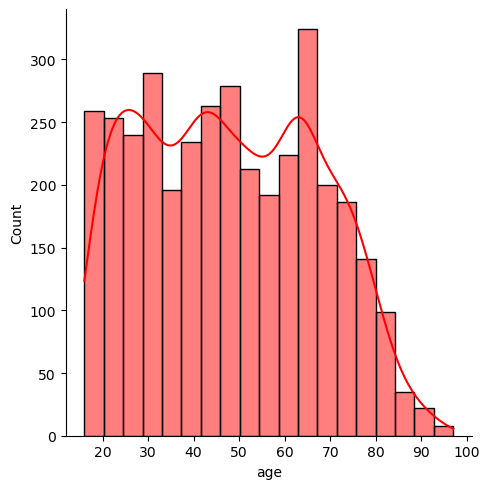

In [89]:
# Distribution of age in the dataset
sns.displot(x='age', data=df, color='red', kde=True)

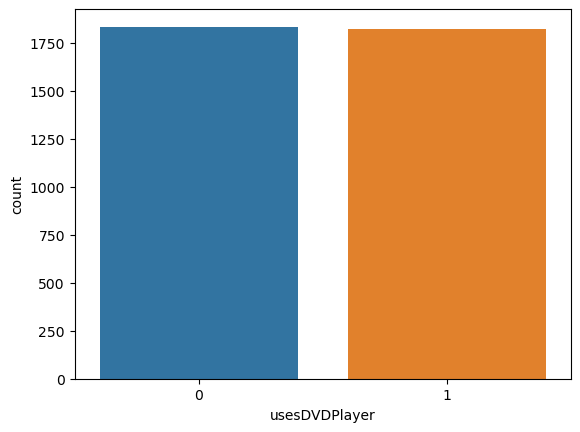

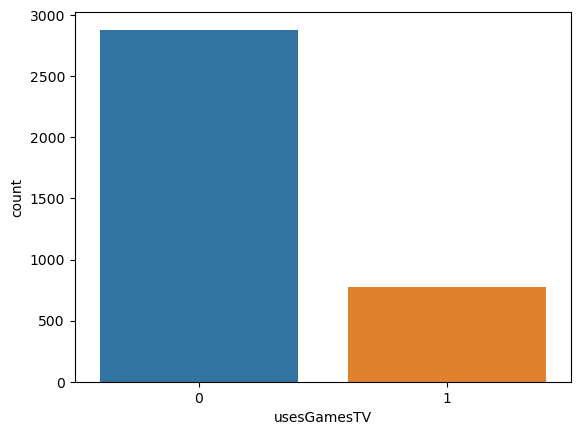

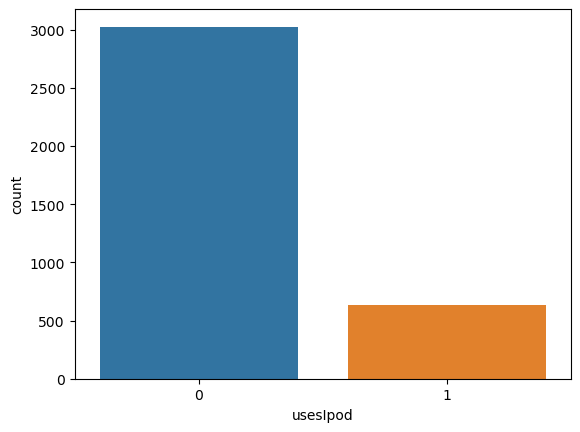

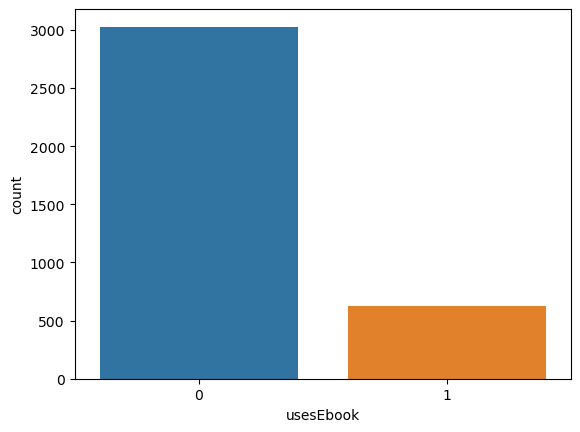

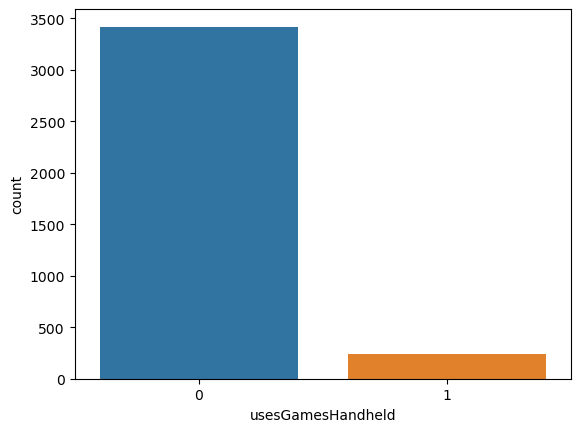

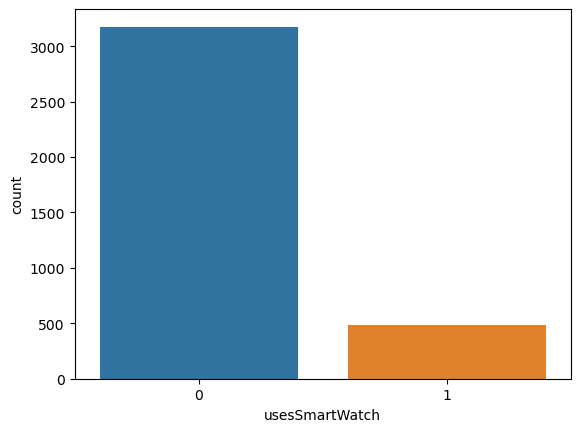

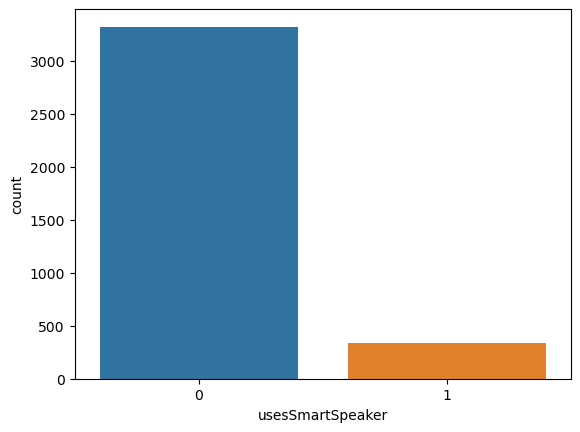

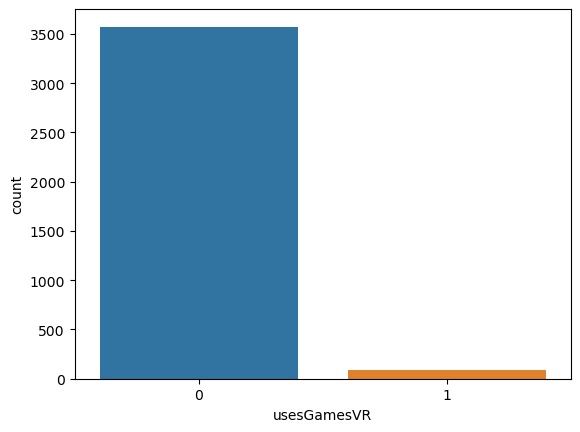

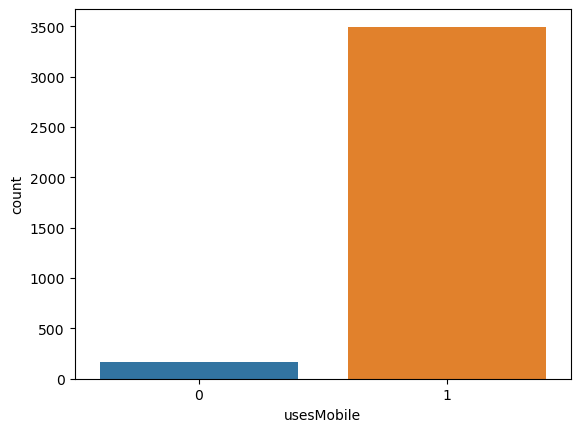

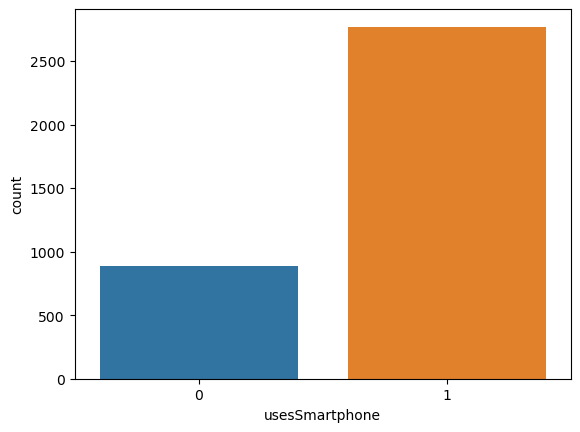

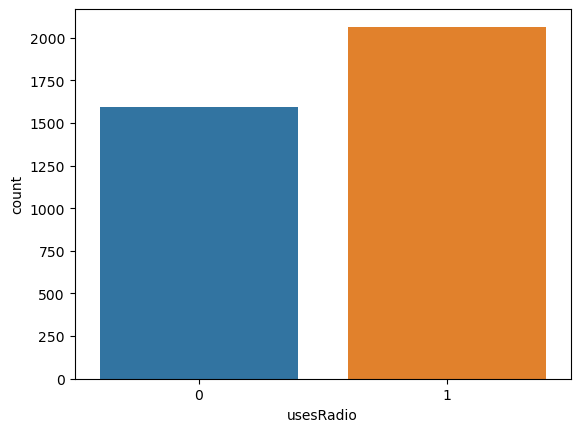

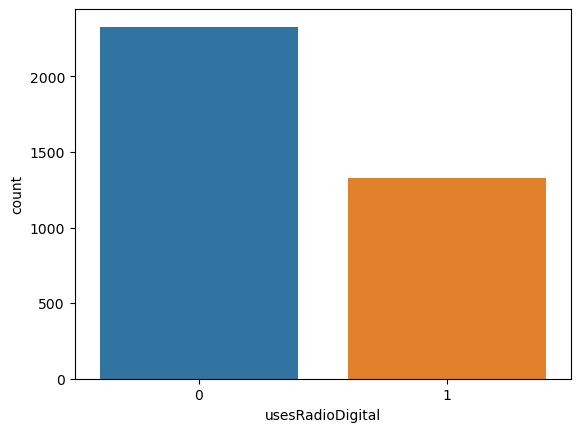

In [95]:
for col in outputColumns:
  plt.figure() # this creates a new figure on which your plot will appear
  sns.countplot(x=col, data=df)

In [85]:
seniorsDF = df.query("age >= 65")

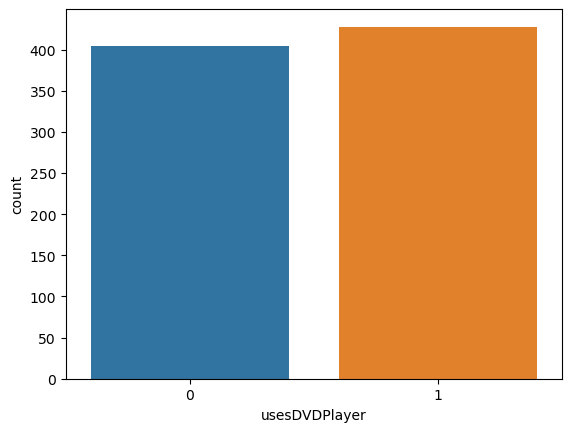

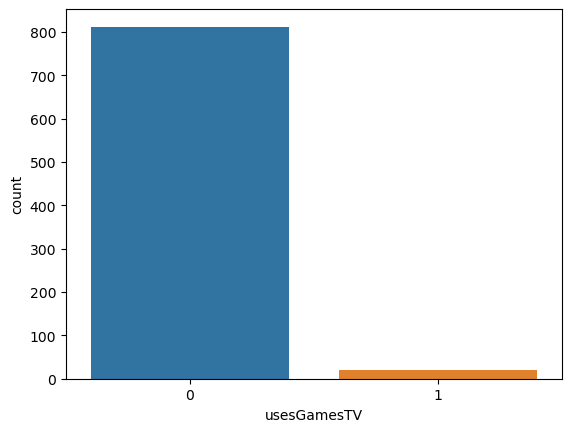

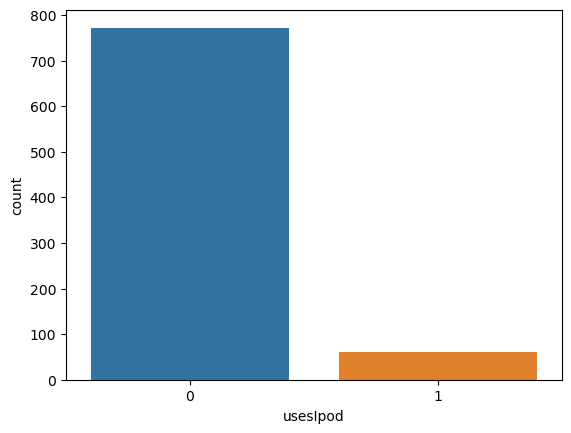

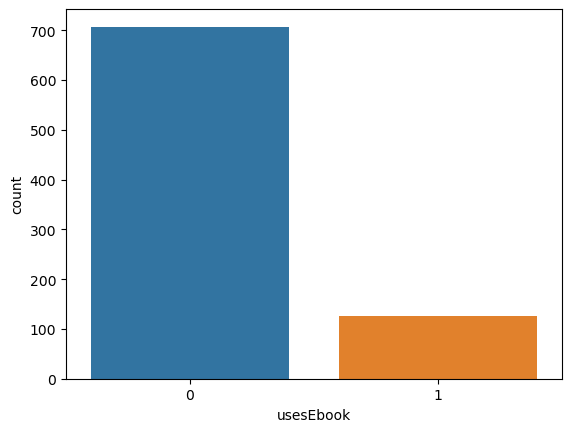

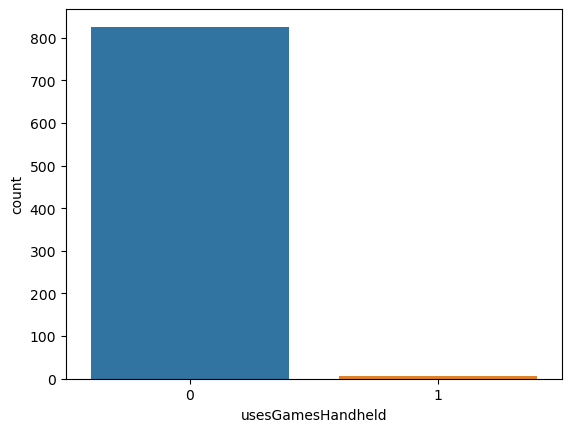

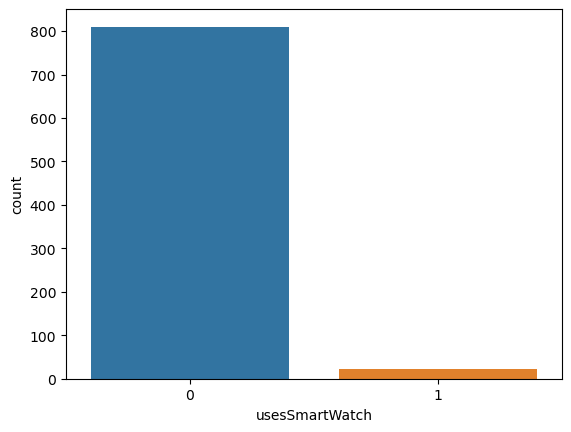

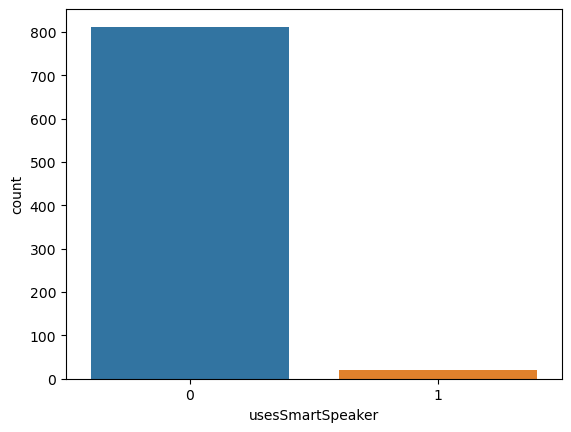

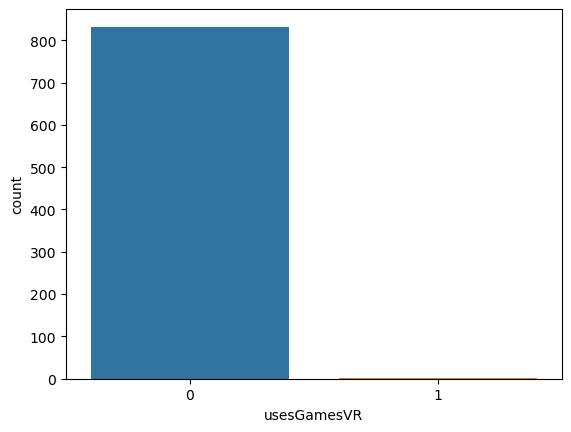

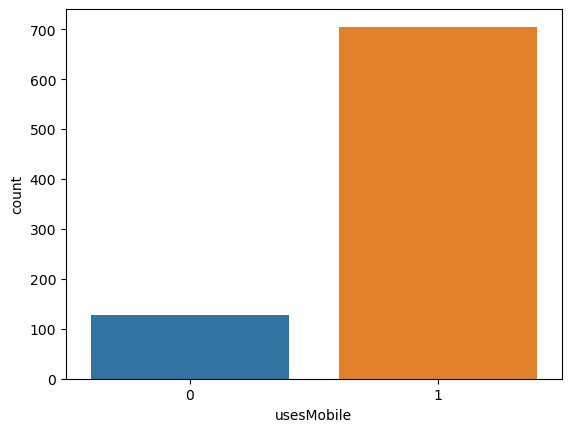

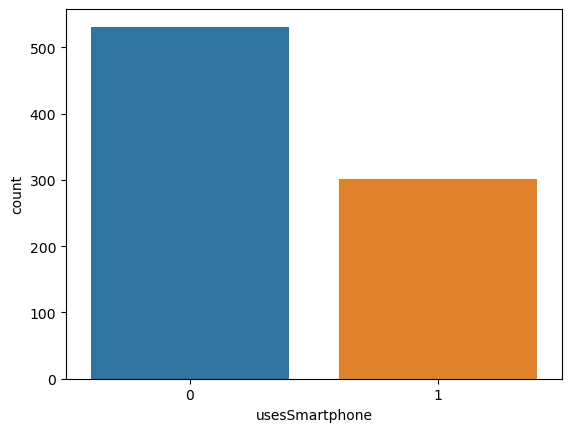

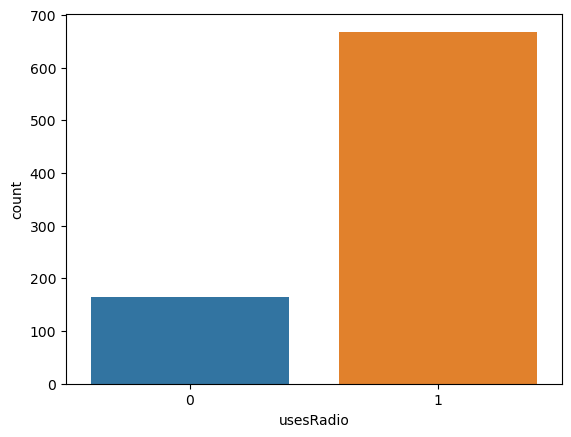

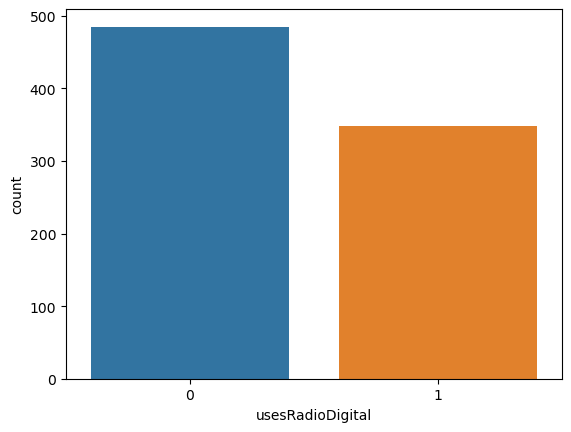

In [99]:
for col in outputColumns:
  plt.figure() # this creates a new figure on which your plot will appear
  sns.countplot(x=col, data=seniorsDF)

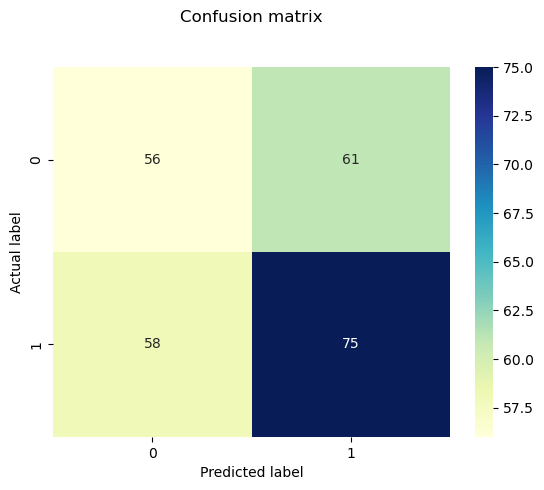

Accuracy of model for usesDVDPlayer: 52.400000000000006%
base rate: 0.5138055222088835 or 0.48619447779111646
---------------------------------------------------------------------------


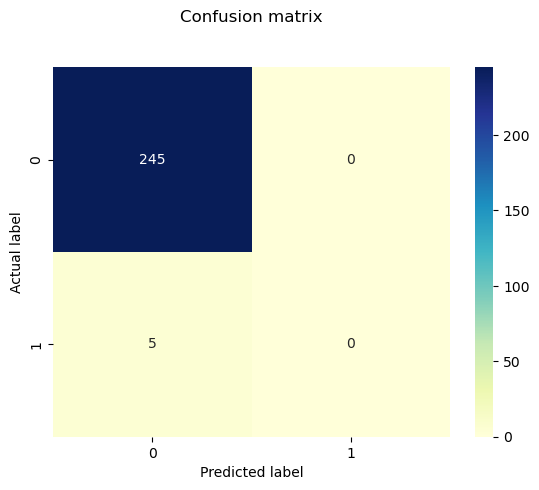

Accuracy of model for usesGamesTV: 98.0%
base rate: 0.025210084033613446 or 0.9747899159663865
---------------------------------------------------------------------------


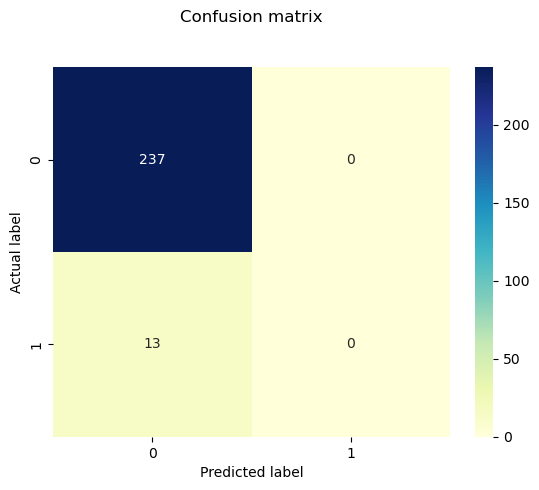

Accuracy of model for usesIpod: 94.8%
base rate: 0.07322929171668667 or 0.9267707082833133
---------------------------------------------------------------------------


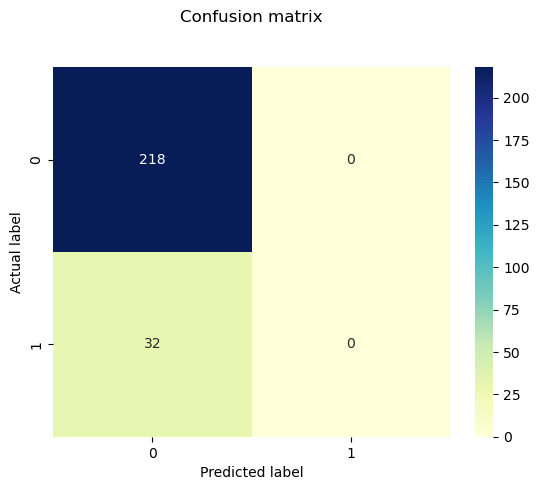

Accuracy of model for usesEbook: 87.2%
base rate: 0.15126050420168066 or 0.8487394957983193
---------------------------------------------------------------------------


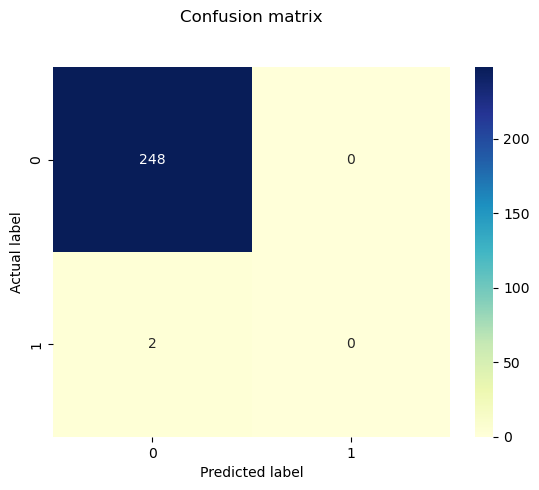

Accuracy of model for usesGamesHandheld: 99.2%
base rate: 0.008403361344537815 or 0.9915966386554622
---------------------------------------------------------------------------


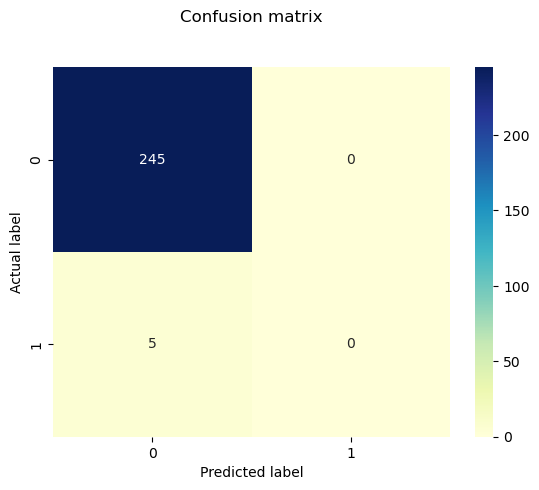

Accuracy of model for usesSmartWatch: 98.0%
base rate: 0.027611044417767107 or 0.9723889555822329
---------------------------------------------------------------------------


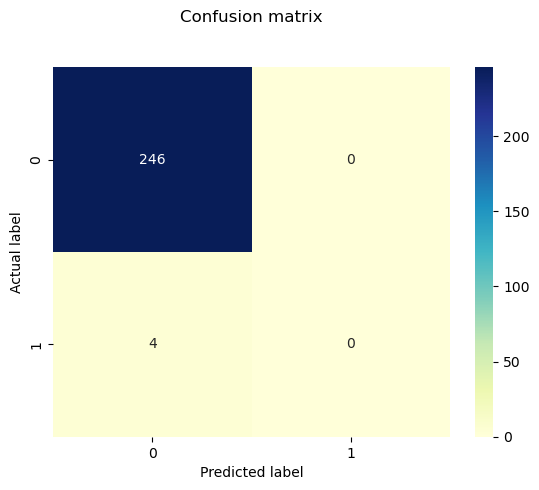

Accuracy of model for usesSmartSpeaker: 98.4%
base rate: 0.025210084033613446 or 0.9747899159663865
---------------------------------------------------------------------------


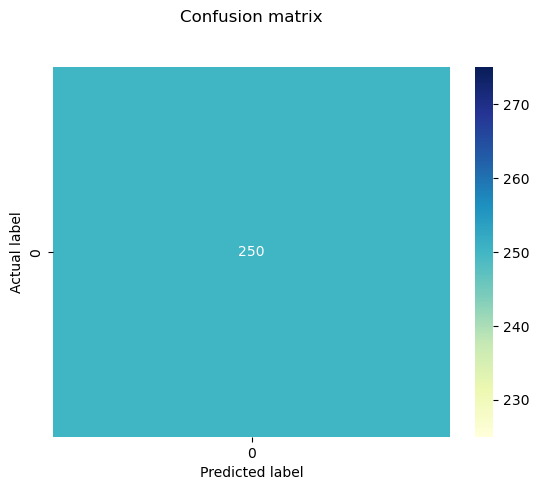

Accuracy of model for usesGamesVR: 100.0%
base rate: 0.0012004801920768306 or 0.9987995198079231
---------------------------------------------------------------------------


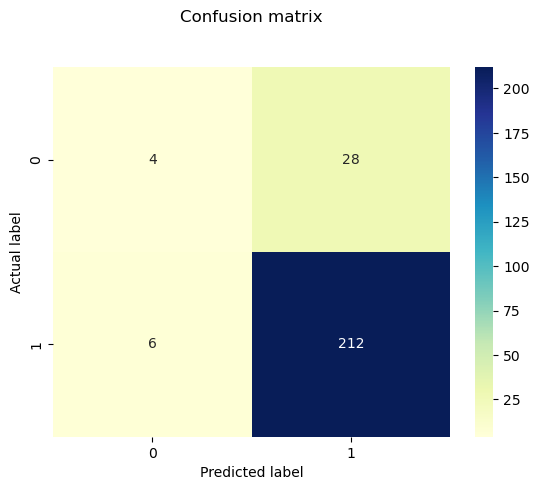

Accuracy of model for usesMobile: 86.4%
base rate: 0.8463385354141657 or 0.15366146458583432
---------------------------------------------------------------------------


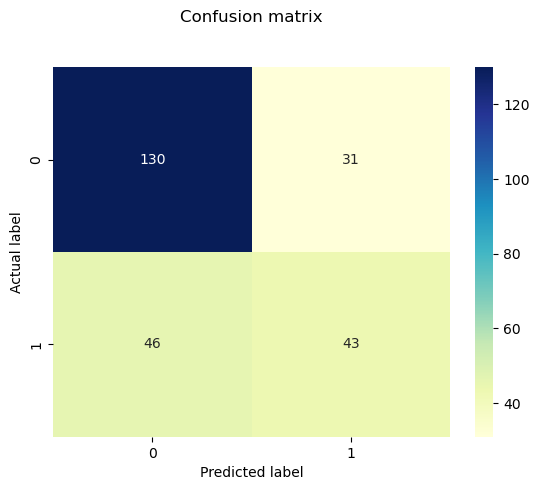

Accuracy of model for usesSmartphone: 69.19999999999999%
base rate: 0.3625450180072029 or 0.6374549819927972
---------------------------------------------------------------------------


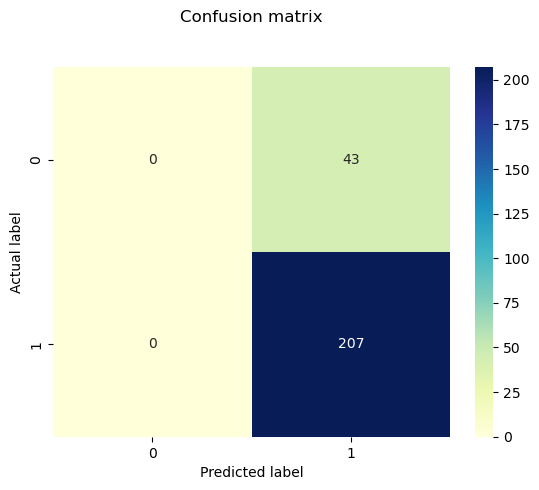

Accuracy of model for usesRadio: 82.8%
base rate: 0.801920768307323 or 0.19807923169267708
---------------------------------------------------------------------------


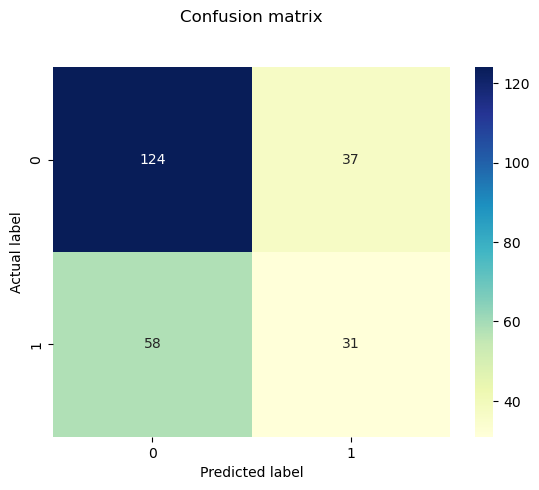

Accuracy of model for usesRadioDigital: 62.0%
base rate: 0.4177671068427371 or 0.5822328931572629
---------------------------------------------------------------------------


In [100]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# df or seniorsDF
df_to_test = seniorsDF

# Select independent variables
X = df_to_test.loc[:, ["age", "isRetired", "isHomebound"]]
X

# Train a model for each output
for col in outputColumns:
  # Get dependent variables
  y = df_to_test.loc[:, col]

  # Split into testing and training sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

  # Make the model
  classifier = LogisticRegression()
  classifier.fit(X_train, y_train)

  # Do the prediction
  y_pred = classifier.predict(X_test)
  result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
  # print(result)

  # Evaluate the model, using a confusion matrix heatmap
  cf_matrix = confusion_matrix(y_test, y_pred)
  plt.figure() # this creates a new figure on which your plot will appear
  sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  plt.show()
  print(f'Accuracy of model for {col}: {accuracy_score(y_test,y_pred) * 100}%')
  print(f"base rate: {df_to_test[col].sum() / df_to_test.shape[0]} or {(df_to_test.shape[0] - df_to_test[col].sum()) / df_to_test.shape[0]}")
  print("---------------------------------------------------------------------------")
